### 使用Python实现感知器学习算法
1. 初始化权重
2. 迭代所有训练样本$x^{(i)}$
    1. 计算误差：$e= y - output$
    2. 更新权重：$\Delta_{w}=\eta ex$

In [28]:
import numpy as np

class Perceptron:
    
    def __init__(self, learn_rate, iter_nums):
        self.learn_rate = learn_rate
        self.iter_nums = iter_nums
        self.wight = None
        self.errors = []
    
    def fit(self, X, Y):
        """
            parameters:
            X: np.ndarray, size:[simples,features]
            Y：np.ndarray, size:features
        """
        simples,features = X.shape
        
        
        self.wight = np.random.random((features + 1, 1))
        # self.wight = np.zeros((features + 1, 1))
        # 确保为二维列向量
        Y = Y.reshape((simples, 1))
        
        for _ in range(self.iter_nums):
            _errors = 0
            for x,y in zip(X, Y):
                x = x.reshape((features, 1))
                output = self.predict(x)
                # 加入每次训练错误样本数量，判断是否收敛
                update = self.learn_rate * (y - output)
                self.wight[0] += update
                self.wight[1:] += update * x
                _errors += int(update != 0.0)
            self.errors.append(_errors)
    def net_input(self, x):
        """
            parameters:
            x: np.ndarray, size:features
            
            return: float
        """
        x = x.reshape((len(x),1))
        
        # 这里使用切片索引
        # 注意Numpy索引方式：用整数方式有可能得到降维的数组，而用切片方式得到的数组永远是原数组的子数组
        return self.wight[0] + np.dot(x.T, self.wight[1:,])
    
    def predict(self, x):
        """
            parameters:
            x: n.ndarray, size:features
        """
        return 1 if self.net_input(x) > 0.0 else -1

### 数据读取、处理

In [29]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

#### 选取两个特征值、以及前100行数据进行训练

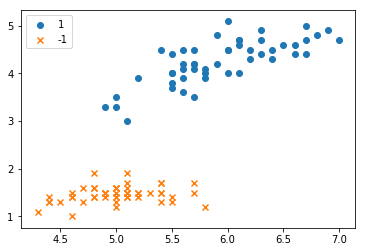

In [30]:
from matplotlib import pyplot as plt
%matplotlib inline

Y = df.iloc[0:100,4].values
Y = np.where(Y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100,[0,2]].values

# 绘制出数据集
ax = plt.axes()

ax.scatter(X[Y==1, 0],X[Y==1, 1], marker='o', label='1')
ax.scatter(X[Y==-1, 0],X[Y==-1, 1], marker='x', label='-1')
ax.legend()

Text(0,0.5,'error samples')

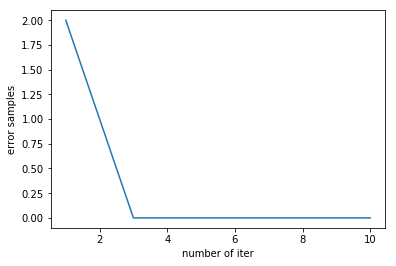

In [31]:
# 训练模型
per = Perceptron(0.1, 10)
per.fit(X, Y)

# 结果
ax = plt.axes()
ax.alot(range(1, len(per.errors) + 1), per.errors)
ax.set_xlabel('number of iter')
ax.set_ylabel('error samples')

#### 可以看到在第4次模型就已经收敛，接下来我们使用我们训练好的模型对前100行数据重新进行预测

1. np.meshgrid图解  
注意最后生成的矩阵shape都是相同的！
![](https://pic4.zhimg.com/80/v2-a7f1c996c371d1167a0fb7b5273c6d01_hd.jpg)

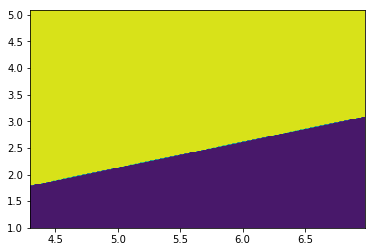

In [32]:
# 构建源数据
interval = 0.02
x0_min, x0_max = X[:, 0].min(),X[:, 0].max()
x1_min, x1_max = X[:, 1].min(),X[:, 1].max()

xy, yx = np.meshgrid(np.arange(x0_min, x0_max, interval),
                    np.arange(x1_min, x1_max,interval))

z = np.array([xy.ravel(), yx.ravel()]).T

# 预测
z_predict = []
for _z in z:
    z_predict.append(per.predict(_z))
    
z_predict = np.array(z_predict).reshape(xy.shape)

# 绘制结果
ax = plt.axes()
ax.contourf(xy, yx, z_predict)